In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "D:\Dataset"
CATEGORIES = ["Ac", "As", "Cb", "Cc", "Ci", "Cs", "Ct", "Cu", "Ns", "Sc", "St"]

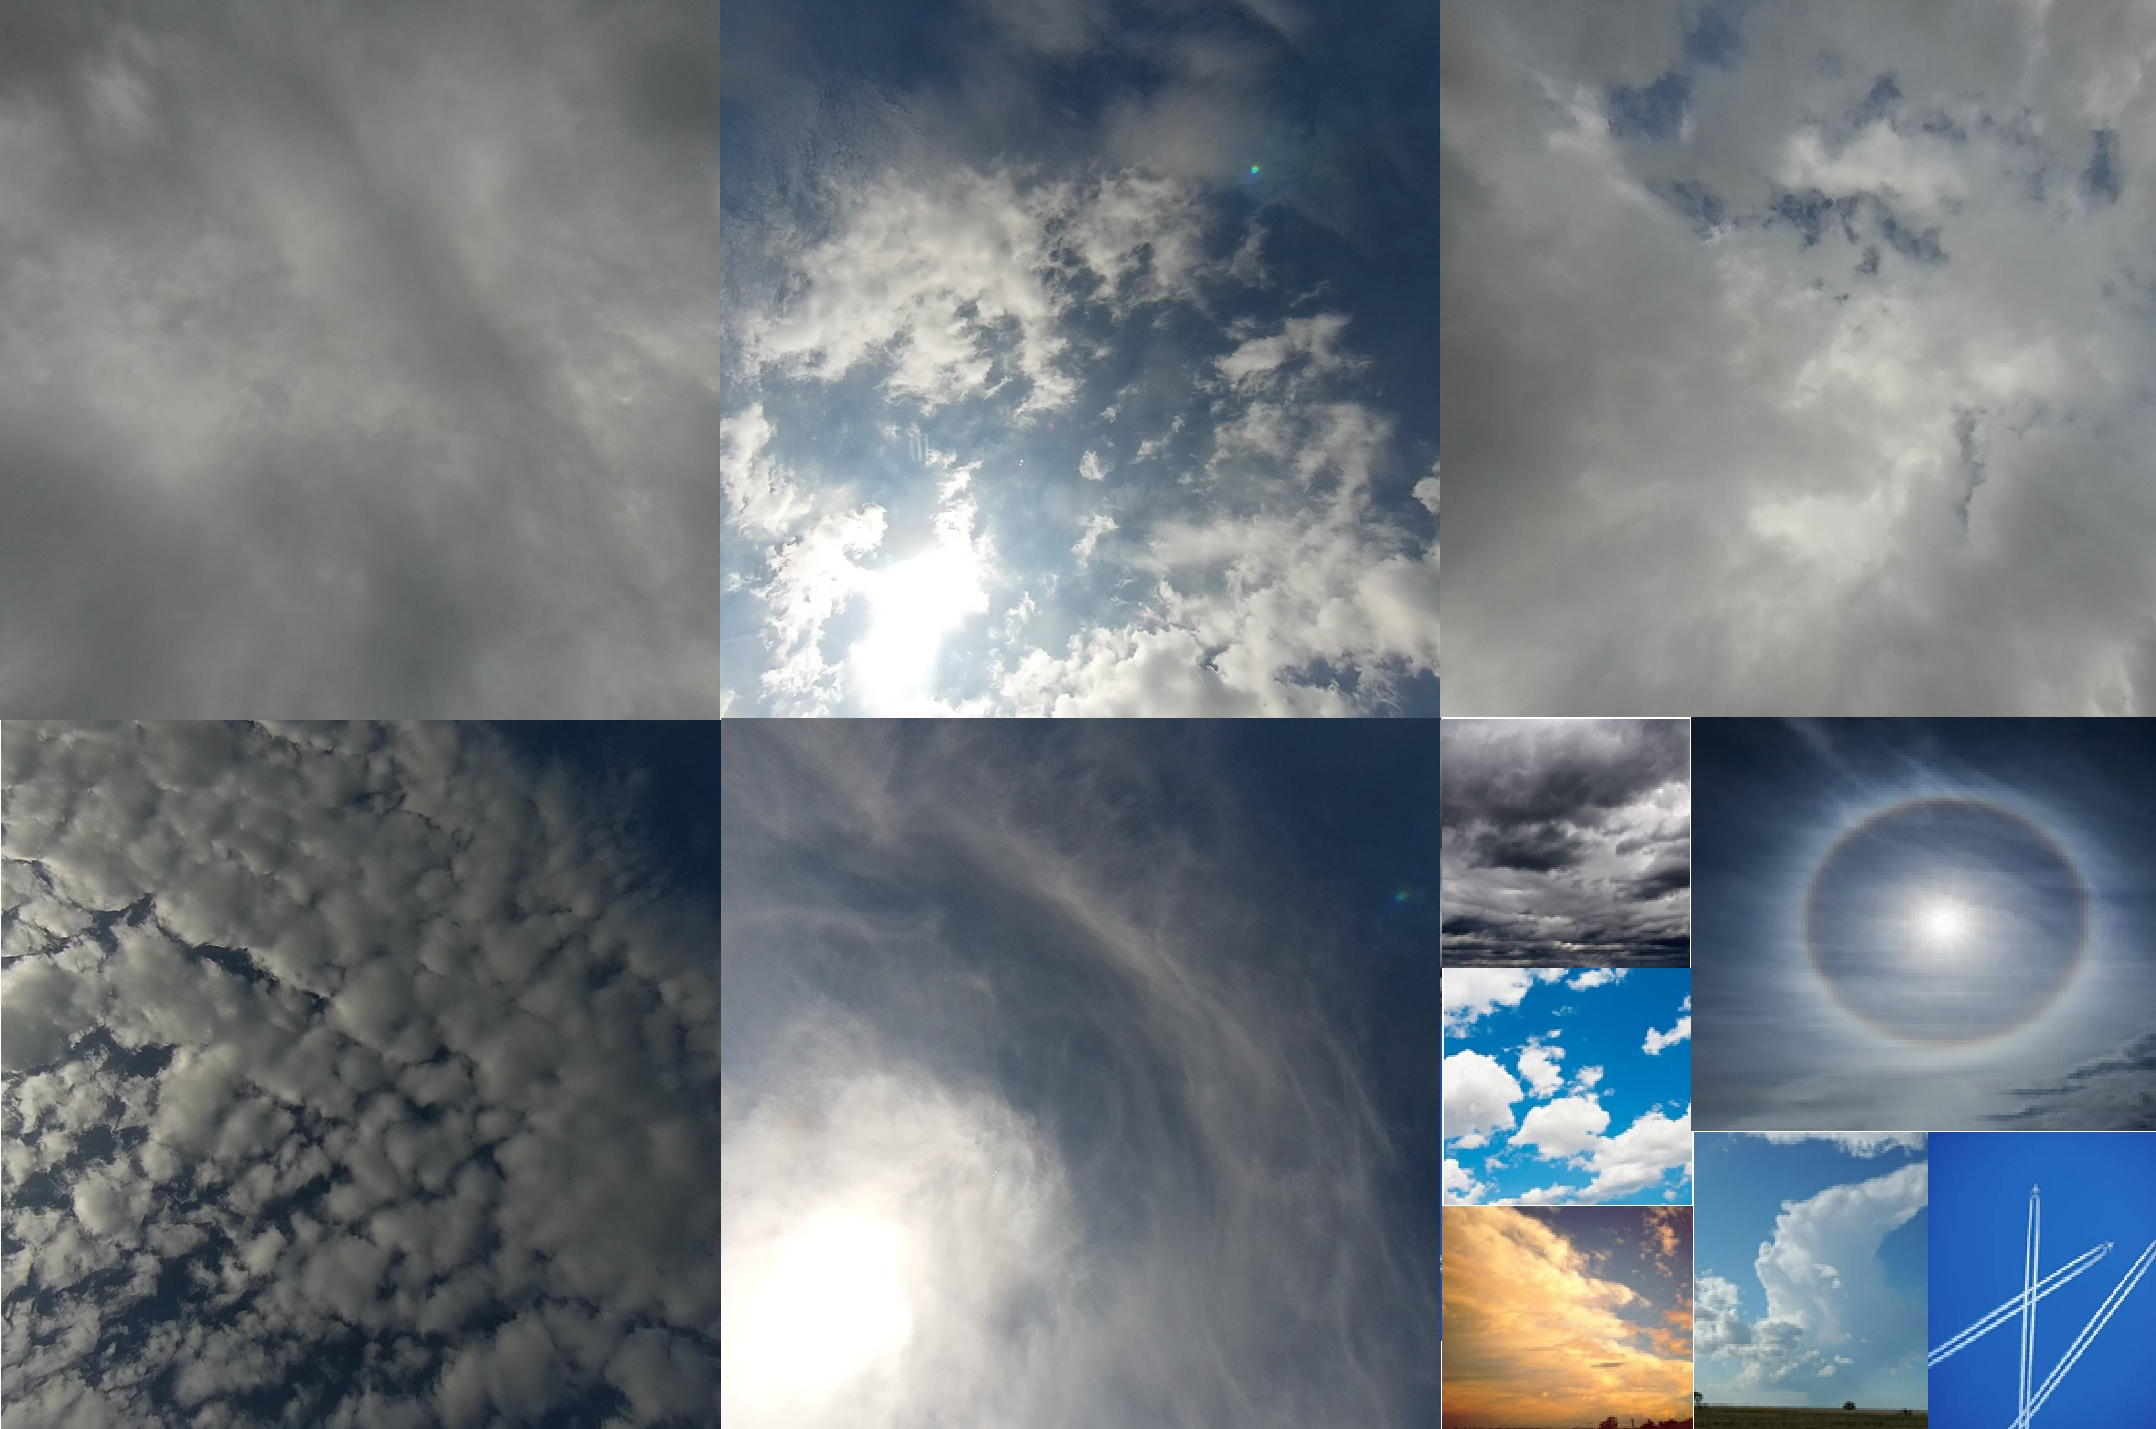

In [3]:
from IPython.display import Image, display
Image(filename="D:\Sample\Sample.jpg") #sample images from the dataset

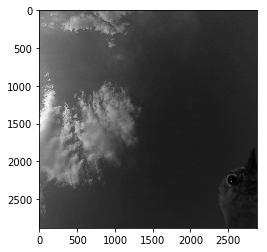

In [4]:
for category in CATEGORIES: #iteration to fetch images from directory  
    path = os.path.join(DATADIR,category)  # create path to cloud types from folder
    for img in os.listdir(path):  # iterate over each image in folder
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # read the images and convert to grayscale
        plt.imshow(img_array, cmap='gray')  # graph
        plt.show()  # display!

        break 
    break 

In [5]:
print(img_array)


[[109 109 109 ...  44  44  43]
 [109 109 109 ...  44  44  43]
 [109 109 109 ...  44  44  43]
 ...
 [ 65  65  65 ...  23  23  23]
 [ 65  65  65 ...  23  23  23]
 [ 65  65  65 ...  23  23  23]]


In [6]:
print(img_array.shape)

(2880, 2880)


In [7]:
IMG_SIZE = 256 #image resize to 256x256

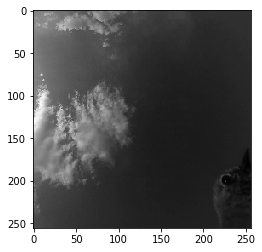

In [8]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []


In [10]:
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to dataset
        class_num = CATEGORIES.index(category)  # assign index 0 to 10 for cloud classes "Ac", "As", "Cb", "Cc", "Ci", "Cs", "Ct", "Cu", "Ns", "Sc", "St"
        print(class_num)
        for img in tqdm(os.listdir(path)):  # iterate over each image per cloud classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

0


100%|███████████████████████████████████████| 239/239 [00:01<00:00, 173.75it/s]


1


100%|███████████████████████████████████████| 204/204 [00:00<00:00, 232.37it/s]


2


100%|███████████████████████████████████████| 242/242 [00:00<00:00, 513.25it/s]


3


100%|███████████████████████████████████████| 306/306 [00:01<00:00, 176.46it/s]


4


100%|████████████████████████████████████████| 180/180 [00:03<00:00, 58.61it/s]


5


100%|███████████████████████████████████████| 287/287 [00:00<00:00, 558.89it/s]


6


100%|███████████████████████████████████████| 200/200 [00:00<00:00, 807.81it/s]


7


100%|███████████████████████████████████████| 337/337 [00:01<00:00, 270.46it/s]


8


100%|███████████████████████████████████████| 274/274 [00:00<00:00, 585.56it/s]


9


100%|███████████████████████████████████████| 357/357 [00:01<00:00, 268.31it/s]


10


100%|███████████████████████████████████████| 439/439 [00:01<00:00, 223.32it/s]


3065


In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]: #random shuffle of cloud categorie images with class_labels
    print(sample[1])

0
0
5
8
0
0
7
0
3
9


In [13]:
X = [] #setting X as set of features
y = [] #setting Y as set of labels

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[225]
   [224]
   [222]
   ...
   [168]
   [167]
   [166]]

  [[224]
   [223]
   [222]
   ...
   [169]
   [168]
   [168]]

  [[223]
   [222]
   [222]
   ...
   [170]
   [169]
   [169]]

  ...

  [[ 39]
   [ 39]
   [ 38]
   ...
   [ 32]
   [ 39]
   [ 36]]

  [[ 37]
   [ 38]
   [ 39]
   ...
   [ 34]
   [ 45]
   [ 47]]

  [[ 35]
   [ 34]
   [ 32]
   ...
   [ 45]
   [ 46]
   [ 43]]]]


In [14]:
import pickle #to save data

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle","rb") #to load data
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
import tensorflow as tf #experimental part results and please consider it as a play ground not effective code help needed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
X = X/255.0

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=20, validation_split=0.3)